In [84]:
    import cv2
    import numpy as np
    import os
    import dicom
    import data
    import copy
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.layers import Convolution2D, MaxPooling2D
    from keras.utils import np_utils
    from keras.optimizers import SGD
    from keras.utils import np_utils

    RECEP_HEI = 56
    RECEP_WEI = 28
    DATA_PATH = os.getcwd()
    MODE_TEST_PATH = '/data/metROI/test_txt'
    
    nb_classes = 2
    count_img = 0
    count = 0
    index = 0
    count_pos = 0
    class_lable = 2
    x_start = RECEP_WEI
    y_start = RECEP_HEI

    TRAIN_DATA_TXT_PATH = DATA_PATH + MODE_TEST_PATH
    IMG_LIST = os.listdir(TRAIN_DATA_TXT_PATH)
    TRAIN_NUM = len(IMG_LIST)
    TRAIN_OUT = []
    TRAIN_IN = []
    Resolution = []
    for name in IMG_LIST:
        
        med_img, test_array = get_input_and_output(TRAIN_DATA_TXT_PATH + '/' + name)
        med_img_pix = cv2.resize(med_img.pixel_array, (320, 320), interpolation=cv2.INTER_AREA)
        test_array = test_array + 0.001
        test_array = cv2.resize(test_array, (320, 320), interpolation=cv2.INTER_AREA)
        
        
        cropImg1 = med_img_pix[0:med_img.Rows, 320/ 4: 3 * 320 / 4]
        cropImg2 = test_array[0:med_img.Rows, 320 / 4: 3 * 320 / 4]
        
        Resolution.append( med_img.PixelSpacing[0]* med_img.Rows / np.float(320) )
        y_max = 320
        x_max = 320 / 2
        
        for i in range(y_start, y_max):
            for m in range(x_start, x_max):
                region = cropImg1[i - RECEP_HEI: i, m - RECEP_WEI: m]
                class_lable = cropImg2[i - RECEP_HEI / 2][m - RECEP_WEI / 2]
                if(class_lable != 1.001 ):
                    TRAIN_IN.append(region.reshape(1, RECEP_HEI, RECEP_WEI))
                    TRAIN_OUT.append(np_utils.to_categorical([0], nb_classes)[0])
                    index += 1
                    # print(index)

                elif (class_lable == 1.001):
                    TRAIN_IN.append(region.reshape(1, RECEP_HEI, RECEP_WEI))
                    TRAIN_OUT.append(np_utils.to_categorical([1], nb_classes)[0])
                    count_pos += 1
                    index += 1
                    # print(index)

                count += 1
        if(index % 1000 == 0):
                print('Processed training set:' + str(index))

        count_img += 1
        print('Processed images:' + str(count_img) + '.Positive num:' +
              str(count_pos) + '.Total size:' + str(index))
    TRAIN_IN = np.asarray(TRAIN_IN, dtype=np.float)
    TRAIN_OUT = np.asarray(TRAIN_OUT, dtype=np.float)
    Resolution = np.asarray(Resolution)

#     print('Normalizing training data...')
#     for i in range(TRAIN_IN.shape[0]):
#         for m in range(TRAIN_IN.shape[1]):

#             mean = np.mean(TRAIN_IN[i][m])  # mean for data centering
#             std = np.std(TRAIN_IN[i][m])  # std for data normalization
#             TRAIN_IN[i][m] = (TRAIN_IN[i][m] - mean) / std
#     model = getmodel()
#     print('Predicting...')
#     predict_result = model.predict_classes(TRAIN_IN)
#     np.save('answer_image'+'.npy',TRAIN_OUT)
#     np.save('predicted_image'+'.npy', predict_result)
#     np.save('input_image'+'.npy',TRAIN_IN)
#     np.save('resolution'+'.npy', Resolution)


Processed images:1.Positive num:911.Total size:34848
Processed images:2.Positive num:1854.Total size:69696
Processed images:3.Positive num:2830.Total size:104544
Processed images:4.Positive num:3771.Total size:139392
Processed images:5.Positive num:4690.Total size:174240
Processed images:6.Positive num:5540.Total size:209088
Processed images:7.Positive num:5555.Total size:243936
Processed images:8.Positive num:5567.Total size:278784
Processed images:9.Positive num:5578.Total size:313632
Processed images:10.Positive num:5873.Total size:348480
Processed images:11.Positive num:6156.Total size:383328
Processed images:12.Positive num:6386.Total size:418176
Processed images:13.Positive num:6642.Total size:453024
Processed images:14.Positive num:6942.Total size:487872
Processed images:15.Positive num:7540.Total size:522720
Processed images:16.Positive num:8055.Total size:557568
Processed images:17.Positive num:8546.Total size:592416
Processed images:18.Positive num:9023.Total size:627264
Proc

In [85]:
def get_input_and_output(source):
    file = open(source, 'r')
    list = file.readlines()
    test_array = np.empty((0, len(list)), int)
    for line in list:
        # print line
        line = line.split(',')
        line[len(line) - 1] = line[len(line) - 1].replace('\n', '')
        line = map(int, line)
        test_array = np.append(test_array, np.array([line]), axis=0)
    dir_array = source.split('/')
    dir_name = dir_array[len(dir_array) - 1].split('_')
    dir_image_file = DATA_PATH + '/data/Sagittal-segmentation/' + \
        dir_name[0] + '/' + dir_name[1] + '/' + \
            str(dir_name[2]).replace('txt', 'dcm')
    medical_img = dicom.read_file(dir_image_file)
    return medical_img, test_array


In [5]:
TRAIN_IN.shape

(2319040, 1, 56, 28)

In [6]:
TRAIN_OUT

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [7]:
Resolution

array([[  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  3.84000000e+02,   2.88000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  3.84000000e+02,   2.88000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  3.84000000e+02,   2.88000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.46900000e-01,
          5.46900000e-01],
       [  5.12000000e+02,   3.84000000e+02,   5.46900000e-01,
          5.46900000e-01],
       [  5.12000000e

In [4]:
med_img

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D', 'FM', 'FIL']
(0008, 0012) Instance Creation Date              DA: '20090521'
(0008, 0013) Instance Creation Time              TM: '130551.859000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.141582010413708326808827334470320252517
(0008, 0020) Study Date                          DA: '20090521'
(0008, 0021) Series Date                         DA: '20090521'
(0008, 0022) Acquisition Date                    DA: '20090521'
(0008, 0023) Content Date                        DA: '20090521'
(0008, 0030) Study Time                          TM: '125806.375000'
(0008, 0031) Series Time                         TM: '130548.609000'
(0008, 0032) Acquisition Time                    TM: '130446.967500'
(0008, 0033) Content Time                        TM: '130551.859000'
(0008, 0050) Accession Number      

In [14]:
cropImg2

array([[ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
       [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
       [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
       ..., 
       [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
       [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
       [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001]])

In [18]:
TRAIN_OUT.shape

(766656, 2)

In [90]:
import cv2
import numpy as np
import os
import dicom
import data
import copy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from scipy import ndimage
from keras.optimizers import SGD
from keras.utils import np_utils
from skimage.morphology import remove_small_objects
from scipy import ndimage
from sklearn import metrics, metrics
from scipy.ndimage.measurements import label


def getPara(predict, true, threshold, resolution):
    (TP, FP, TN, FN, class_lable) = perf_measure(true, predict, threshold)
    if((TP + FN) == 0):
        TPR = 0
    else:
        TPR = np.float(TP) / (TP + FN)

    class_lable = class_lable.astype(
        bool).reshape(320 ,  160)
    true = true.astype(bool).reshape(320 , 160)

    predict2 = remove_small_objects(class_lable, 160 * resolution, in_place=False)
    labeled_array1, num_features1 = label(predict2)
    labeled_array2, num_features2 = label(true)
    FP_num = num_features1 - num_features2
    if FP_num < 0:
        FP_num = 0
    return TPR, FP_num


def perf_measure(y_actual, predict, threshold):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    predict = transfer_prob(predict, threshold)
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 1:
            TP += 1
    for i in range(len(predict)):
        if y_actual[i] == 0 and y_actual[i] != predict[i]:
            FP += 1
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 0:
            TN += 1
    for i in range(len(predict)):
        if y_actual[i] == 1 and y_actual[i] != predict[i]:
            FN += 1

    return(TP, FP, TN, FN, predict)


def transfer_prob(y_score, threshold):
    y_result = []
    for i in range(len(y_score)):
        if y_score[i] >= threshold:
            y_result.append(1)
        else:
            y_result.append(0)
    return np.asarray(y_result)




In [178]:
y_score = np.load('./resolution/predicted_image.npy')
y_true = np.load('./resolution/answer_image.npy')
reso = np.load('./resolution/resolution.npy')

y_score = y_score[0:y_score.shape[0], 1]
y_true = y_true[0:y_true.shape[0], 1]

scores = []
trues = []
next_start = 0
for i in range(len(reso)):
    ysize = 264
    xsize = 132
    scores.append(y_score[next_start: next_start + np.int(ysize * xsize)])
    trues.append(y_true[next_start: next_start + np.int(ysize * xsize)])
    next_start = np.int(next_start + ysize * xsize)


y_score = np.asarray(scores)
y_true = np.asarray(trues)


In [179]:
y_true

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [219]:
tmp2 = y_score[9].reshape(264, 132)

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.morphology import binary_erosion, binary_dilation

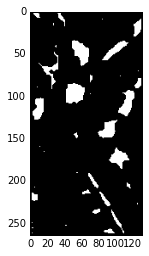

In [234]:
tmp2 = tmp2>0.1

num = 2
x = np.arange( -num , num+1, 1)
xx, yy  = np.meshgrid( x, x )
struc = (xx * xx + yy * yy)<= num * num
tmp2 = binary_dilation(tmp2, struc)
tmp2 = binary_erosion(tmp2, struc)
plt.imshow(tmp2>0.1,'gray')


In [233]:
struc

array([[False, False,  True, False, False],
       [False,  True,  True,  True, False],
       [ True,  True,  True,  True,  True],
       [False,  True,  True,  True, False],
       [False, False,  True, False, False]], dtype=bool)

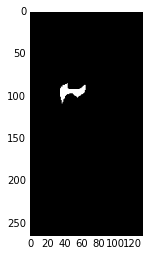

In [197]:
tmp = y_true[9].reshape(264, 132)
plt.imshow(tmp,'gray')

In [86]:
out = TRAIN_OUT[0:TRAIN_OUT.shape[0], 1]

In [87]:
o = []
next_start = 0
ysize = 264
xsize = 132
for i in range((22)):
    o.append(out[next_start: next_start + np.int(ysize * xsize)])
    next_start = np.int(next_start + ysize * xsize)

In [163]:
    count_img = 0
    count = 0
    index = 0
    count_pos = 0
    class_lable = 2
    x_start = RECEP_WEI
    y_start = RECEP_HEI

    TRAIN_DATA_TXT_PATH = DATA_PATH + MODE_TEST_PATH
    IMG_LIST = os.listdir(TRAIN_DATA_TXT_PATH)
    TRAIN_NUM = len(IMG_LIST)
    TRAIN_OUT = []
    TRAIN_IN = []
    Resolution = []
    for name in IMG_LIST:

        med_img, test_array = get_input_and_output(TRAIN_DATA_TXT_PATH + '/' + name)
        med_img_pix = cv2.resize(med_img.pixel_array, (320, 320), interpolation=cv2.INTER_AREA)
        test_array = test_array + 0.001
        test_array = cv2.resize(test_array, (320, 320), interpolation=cv2.INTER_AREA)


        cropImg1 = med_img_pix[0:320, 320/ 4: 3 * 320 / 4]
        cropImg2 = test_array[0:320, 320 / 4: 3 * 320 / 4]

        Resolution.append( med_img.PixelSpacing[0]* med_img.Rows / np.float(320) )
        y_max = 320
        x_max = 320 / 2

        for i in range(y_start, y_max):
            for m in range(x_start, x_max):
                region = cropImg1[i - RECEP_HEI: i, m - RECEP_WEI: m]
                class_lable = cropImg2[i - RECEP_HEI / 2][m - RECEP_WEI / 2]
                if(class_lable != 1.001 ):
                    TRAIN_IN.append(region.reshape(1, RECEP_HEI, RECEP_WEI))
                    TRAIN_OUT.append(np_utils.to_categorical([0], nb_classes)[0])
                    index += 1
                    # print(index)

                elif (class_lable == 1.001):
                    TRAIN_IN.append(region.reshape(1, RECEP_HEI, RECEP_WEI))
                    TRAIN_OUT.append(np_utils.to_categorical([1], nb_classes)[0])
                    count_pos += 1
                    index += 1
                    # print(index)

                count += 1
        if(index % 1000 == 0):
                print('Processed training set:' + str(index))

        count_img += 1
        print('Processed images:' + str(count_img) + '.Positive num:' +
              str(count_pos) + '.Total size:' + str(index))
    TRAIN_IN = np.asarray(TRAIN_IN, dtype=np.float)
    TRAIN_OUT = np.asarray(TRAIN_OUT, dtype=np.float)
    Resolution = np.asarray(Resolution)

Processed images:1.Positive num:911.Total size:34848
Processed images:2.Positive num:1854.Total size:69696
Processed images:3.Positive num:2830.Total size:104544
Processed images:4.Positive num:3771.Total size:139392
Processed images:5.Positive num:4690.Total size:174240
Processed images:6.Positive num:5540.Total size:209088
Processed images:7.Positive num:5555.Total size:243936
Processed images:8.Positive num:5567.Total size:278784
Processed images:9.Positive num:5578.Total size:313632
Processed images:10.Positive num:5873.Total size:348480
Processed images:11.Positive num:6156.Total size:383328
Processed images:12.Positive num:6386.Total size:418176
Processed images:13.Positive num:6642.Total size:453024
Processed images:14.Positive num:6942.Total size:487872
Processed images:15.Positive num:7540.Total size:522720
Processed images:16.Positive num:8055.Total size:557568
Processed images:17.Positive num:8546.Total size:592416
Processed images:18.Positive num:9023.Total size:627264
Proc

In [165]:
TRAIN_OUT = TRAIN_OUT[0:TRAIN_OUT.shape[0], 1]

In [170]:
tmp = TRAIN_OUT[0:34848]